# Instituto Federal de Minas Gerais - Campus Ouro Preto

## Pós Graduação em Inteligência Artificial

Disciplina: Análise e Previsão de Séries Temporais

Prof.: Prof. Dr. Carlos Severiano

Aluno: Pâmela Murta Castro Lima

2. Utilize novamente a série vendas_brasil para testar um mecanismo de previsão. Trata-
se de um mecanismo mais simplificado, que terá como base a tendência estimada por
uma regressão linear. Realize os seguintes passos:


a. Estime a tendência utilizando regressão linear. Em python, utilize a função fit()
do módulo Linear Regression
(https://www.statsmodels.org/stable/regression.html)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Importe o módulo statsmodels
from statsmodels.regression.linear_model import OLS


# Carregando o arquivo CSV com a formatação correta das datas
data = pd.read_csv('vendas_brasil.csv', delimiter=',', parse_dates=['Mês'], dayfirst=True, date_format='%d/%m/%y')

# Definindo 'Mês' como o índice do DataFrame
data.set_index('Mês', inplace=True)

# Certifique-se de que a coluna 'Brasil' seja do tipo numérico
data['Brasil'] = data['Brasil'].str.replace('.', '').astype(float)

# Visualizando as primeiras linhas dos dados
print(data.head())


               Brasil
Mês                  
2000-01-01  4656262.0
2000-02-01  4708777.0
2000-03-01  4910081.0
2000-04-01  4910081.0
2000-05-01  5111386.0


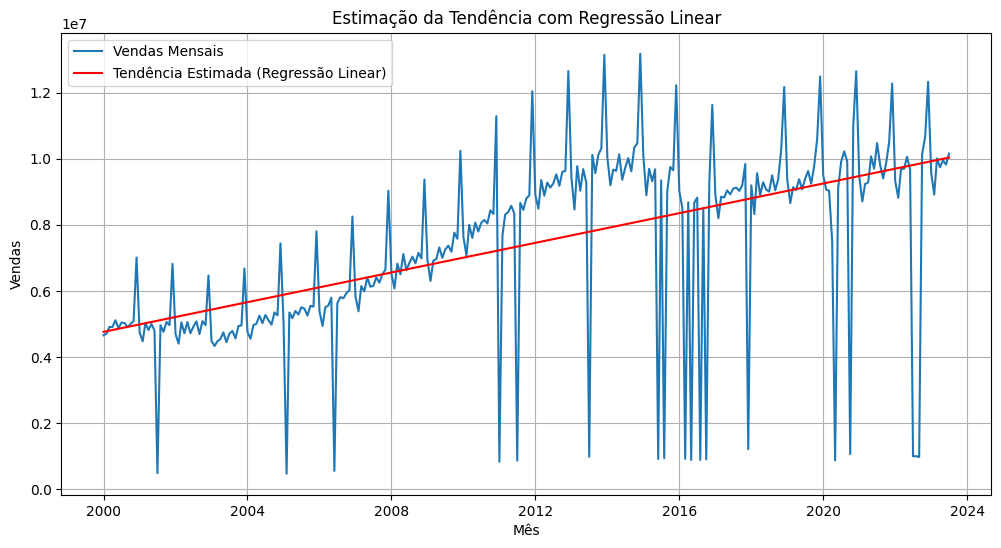

In [15]:

# Passo 1: Estimar a tendência utilizando regressão linear
X = np.arange(len(data)).reshape(-1, 1)  # Índices dos meses
y = data['Brasil'].values  # Convertendo a coluna 'Brasil' para um array NumPy
model = OLS(y, sm.add_constant(X)).fit()
tendencia_estimada = model.predict(sm.add_constant(X))


# Visualizando a tendência estimada
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'], label='Vendas Mensais')
plt.plot(data.index, tendencia_estimada, color='red', label='Tendência Estimada (Regressão Linear)')
plt.title('Estimação da Tendência com Regressão Linear')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()



b. Elimine a tendência com o valor estimado pela regressão linear


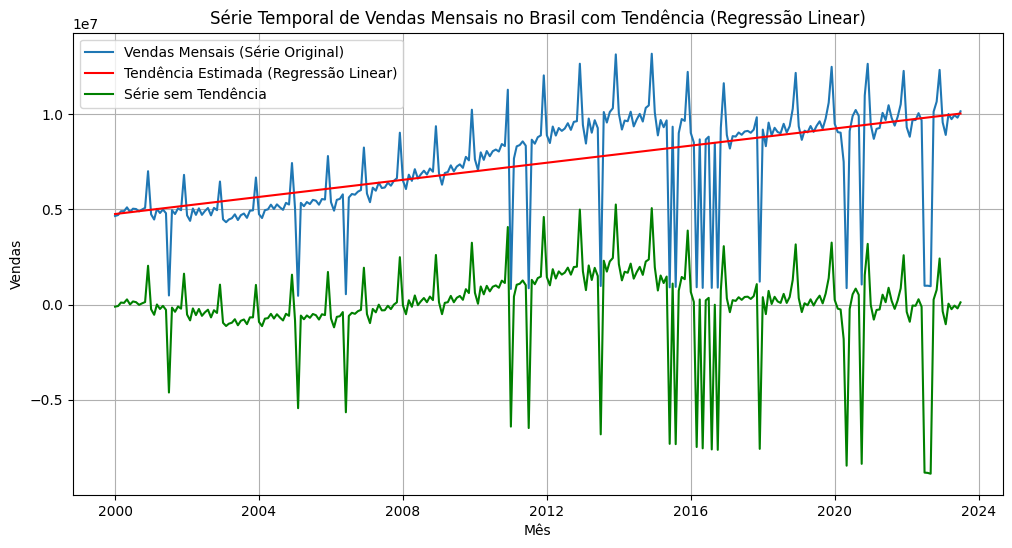

In [16]:
# Passo 2: Eliminar a tendência com o valor estimado pela regressão linear
serie_sem_tendencia = data['Brasil'] - tendencia_estimada

# Visualizando a série original e a série sem tendência
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'], label='Vendas Mensais (Série Original)')
plt.plot(data.index, tendencia_estimada, color='red', label='Tendência Estimada (Regressão Linear)')
plt.plot(data.index, serie_sem_tendencia, color='green', label='Série sem Tendência')
plt.title('Série Temporal de Vendas Mensais no Brasil com Tendência (Regressão Linear)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()




c. Estime a sazonalidade através das médias móveis

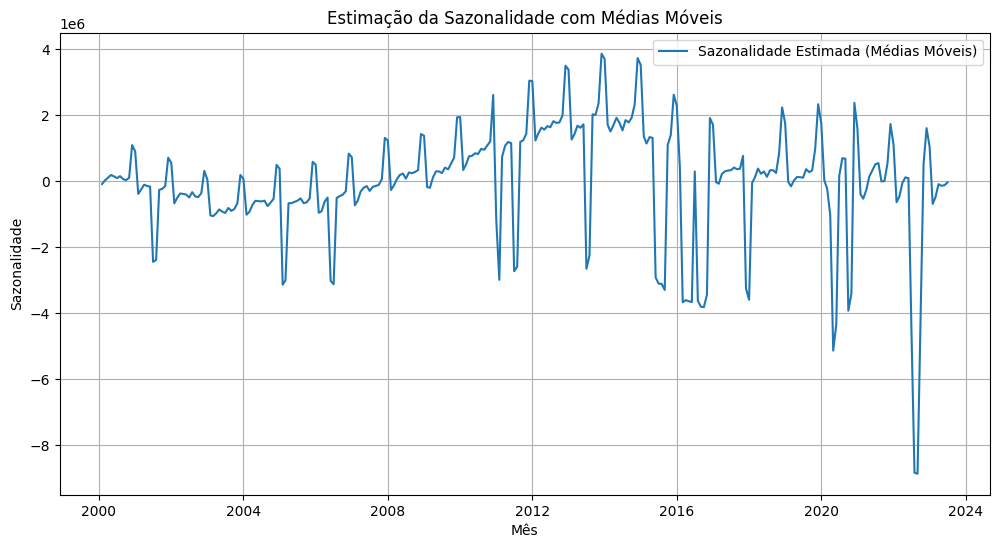

In [17]:
# Estimando a sazonalidade com médias móveis
sazonalidade_tam = 2
sazonalidade = serie_sem_tendencia.rolling(sazonalidade_tam).mean()

# Visualizando a sazonalidade estimada
plt.figure(figsize=(12, 6))
plt.plot(serie_sem_tendencia.index, sazonalidade, label='Sazonalidade Estimada (Médias Móveis)')
plt.title('Estimação da Sazonalidade com Médias Móveis')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade')
plt.legend()
plt.grid(True)
plt.show()


d. Elimine a sazonalidade

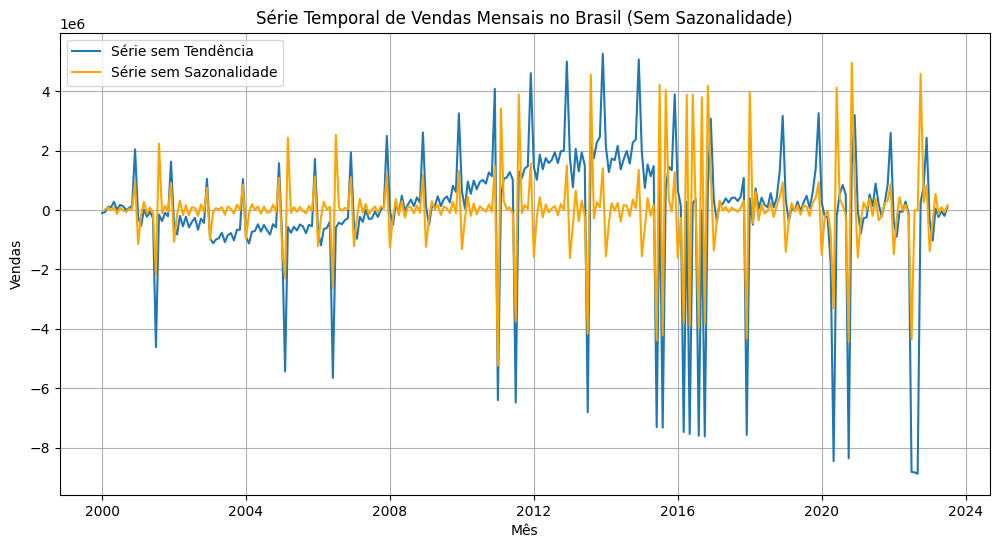

In [26]:
# Eliminando a sazonalidade da série sem tendência
serie_sem_sazonalidade = serie_sem_tendencia - sazonalidade

# Visualizando a série sem tendência e a série sem sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(serie_sem_tendencia.index, serie_sem_tendencia, label='Série sem Tendência')
plt.plot(serie_sem_tendencia.index, serie_sem_sazonalidade, color='orange', label='Série sem Sazonalidade')
plt.title('Série Temporal de Vendas Mensais no Brasil (Sem Sazonalidade)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()



e. Utilize a função predict() do modelo de regressão linear para gerar a reta de
tendência para todos os índices da série

In [19]:
tendencia_estimada = model.predict(sm.add_constant(X))


f. Adicione a tendência estimada à sazonalidade


In [20]:
serie_com_tendencia = tendencia_estimada + sazonalidade


g. Adicione ao resultado um ruído de média zero


In [21]:

ruido = np.random.normal(0, 1, len(serie_com_tendencia))
serie_final = serie_com_tendencia + ruido


h. Compare em um mesmo gráfico a série original e a série prevista

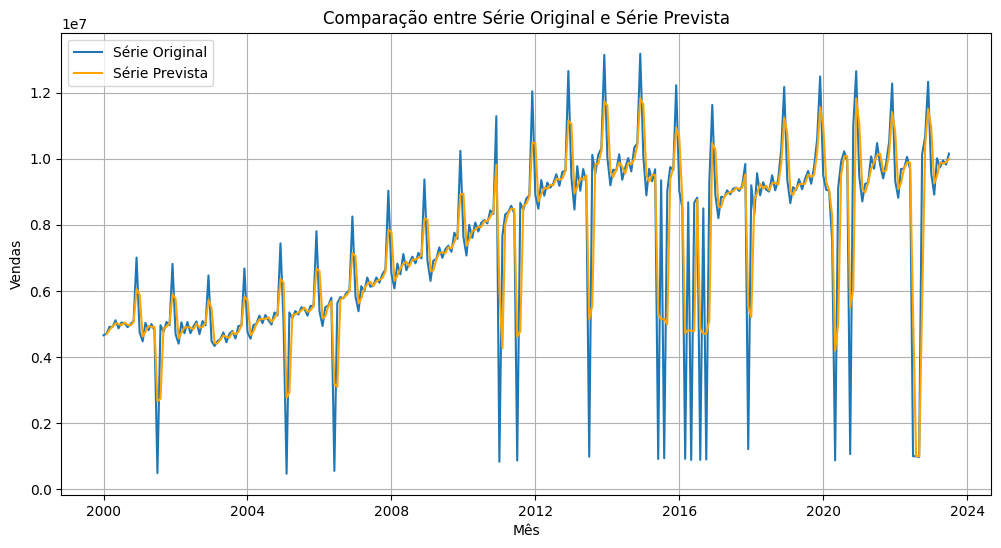

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'], label='Série Original')
plt.plot(data.index, serie_final, color='orange', label='Série Prevista')
plt.title('Comparação entre Série Original e Série Prevista')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()
